# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] -273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | newman
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | arcos de la frontera
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | bay roberts
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | ulsteinvik
Processing Record 14 of Set 1 | kerman
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | shangzhi
Processing Record 17 of Set 1 | san isidro de curuguaty
Processing Record 18 of Set 1 | glace bay
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | lumphat
Processing Record 21 of Set 1 | wailua homesteads
Process

Processing Record 37 of Set 4 | tolanaro
Processing Record 38 of Set 4 | kuanda
Processing Record 39 of Set 4 | mossel bay
Processing Record 40 of Set 4 | viligili
City not found. Skipping...
Processing Record 41 of Set 4 | devinuwara
City not found. Skipping...
Processing Record 42 of Set 4 | abra pampa
Processing Record 43 of Set 4 | union choco
City not found. Skipping...
Processing Record 44 of Set 4 | kingston
Processing Record 45 of Set 4 | ta`u
Processing Record 46 of Set 4 | soio
Processing Record 47 of Set 4 | callao
Processing Record 48 of Set 4 | smithers
Processing Record 49 of Set 4 | anna regina
Processing Record 0 of Set 5 | williams lake
Processing Record 1 of Set 5 | nguigmi
Processing Record 2 of Set 5 | qamdo
Processing Record 3 of Set 5 | isafjordur
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | sandnessjoen
Processing Record 6 of Set 5 | klyuchi
Processing Record 7 of Set 5 | baruun-urt
Processing Record 8 of Set 5 | federacion
Processing Rec

Processing Record 27 of Set 8 | helena valley west central
Processing Record 28 of Set 8 | xam nua
Processing Record 29 of Set 8 | chita
Processing Record 30 of Set 8 | mpongwe
Processing Record 31 of Set 8 | rubtsovsk
Processing Record 32 of Set 8 | port augusta
Processing Record 33 of Set 8 | ormara
Processing Record 34 of Set 8 | chos malal
Processing Record 35 of Set 8 | kolonia
Processing Record 36 of Set 8 | kudahuvadhoo
Processing Record 37 of Set 8 | st. john's
Processing Record 38 of Set 8 | amahai
Processing Record 39 of Set 8 | hiratacho
Processing Record 40 of Set 8 | mugia
Processing Record 41 of Set 8 | sekong
Processing Record 42 of Set 8 | kupang
Processing Record 43 of Set 8 | rukban
City not found. Skipping...
Processing Record 44 of Set 8 | tuen mun
City not found. Skipping...
Processing Record 45 of Set 8 | san carlos
Processing Record 46 of Set 8 | anadyr
Processing Record 47 of Set 8 | leticia
Processing Record 48 of Set 8 | uturoa
Processing Record 49 of Set 8 | 

Processing Record 13 of Set 12 | turpan
Processing Record 14 of Set 12 | louisville
Processing Record 15 of Set 12 | bafilo
Processing Record 16 of Set 12 | tsetserleg
Processing Record 17 of Set 12 | urucurituba
Processing Record 18 of Set 12 | micheweni
Processing Record 19 of Set 12 | uige
Processing Record 20 of Set 12 | cibinong
Processing Record 21 of Set 12 | vanimo
Processing Record 22 of Set 12 | tibanbang
Processing Record 23 of Set 12 | karacoban
Processing Record 24 of Set 12 | kinablangan
Processing Record 25 of Set 12 | spassk
Processing Record 26 of Set 12 | haiku-pauwela
Processing Record 27 of Set 12 | al bawiti
Processing Record 28 of Set 12 | tual
Processing Record 29 of Set 12 | talnakh
Processing Record 30 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 31 of Set 12 | pirae
Processing Record 32 of Set 12 | oranjemund
Processing Record 33 of Set 12 | awjilah
Processing Record 34 of Set 12 | zemio
Processing Record 35 of Set 12 | twon-brass
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,4.28,76,30,11.89,RO,1701241878
1,whitehorse,60.7161,-135.0538,-13.16,92,15,1.79,CA,1701241667
2,albany,42.6001,-73.9662,-3.36,70,6,1.34,US,1701241889
3,waitangi,-43.9535,-176.5597,11.01,78,40,0.89,NZ,1701241681
4,longyearbyen,78.2186,15.6401,-0.09,86,75,4.12,SJ,1701241897


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,4.28,76,30,11.89,RO,1701241878
1,whitehorse,60.7161,-135.0538,-13.16,92,15,1.79,CA,1701241667
2,albany,42.6001,-73.9662,-3.36,70,6,1.34,US,1701241889
3,waitangi,-43.9535,-176.5597,11.01,78,40,0.89,NZ,1701241681
4,longyearbyen,78.2186,15.6401,-0.09,86,75,4.12,SJ,1701241897


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

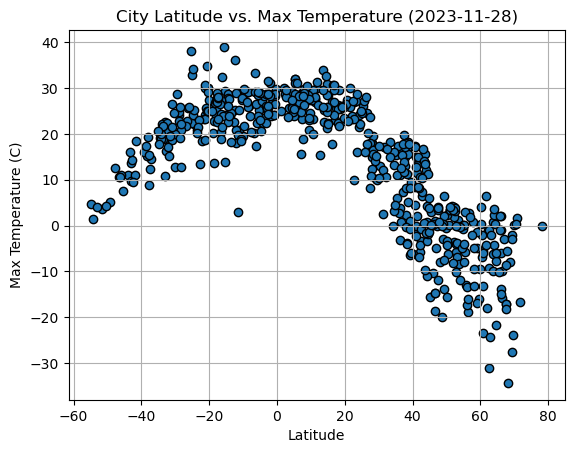

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

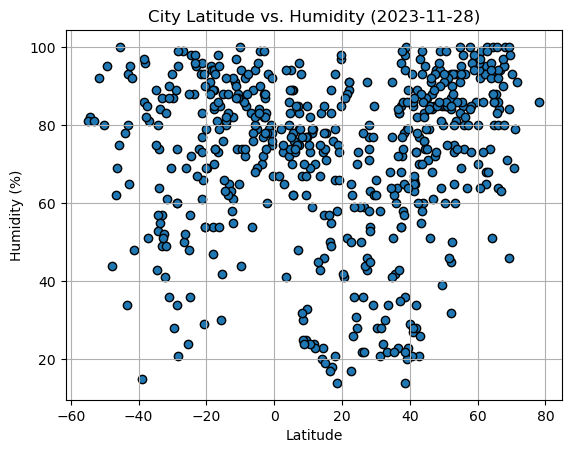

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

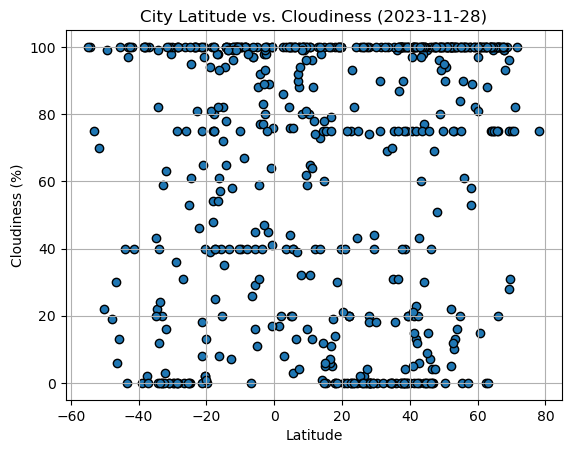

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

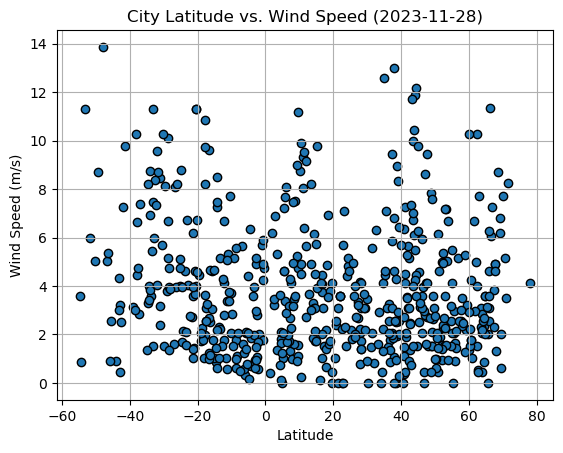

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression_values = x_value * slope + intercept
    line_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    print("The r-value is: ", rvalue)
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regression_values,"r")
    plt.annotate(line_equation, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,4.28,76,30,11.89,RO,1701241878
1,whitehorse,60.7161,-135.0538,-13.16,92,15,1.79,CA,1701241667
2,albany,42.6001,-73.9662,-3.36,70,6,1.34,US,1701241889
4,longyearbyen,78.2186,15.6401,-0.09,86,75,4.12,SJ,1701241897
5,newman,37.3138,-121.0208,7.38,54,0,1.89,US,1701241643


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,11.01,78,40,0.89,NZ,1701241681
6,grytviken,-54.2811,-36.5092,1.49,82,100,0.88,GS,1701241904
8,edinburgh of the seven seas,-37.0676,-12.3116,14.47,81,100,7.39,SH,1701241911
9,alice springs,-23.7000,133.8833,20.75,88,100,4.63,AU,1701241911
11,dunedin,-45.8742,170.5036,11.00,75,13,0.89,NZ,1701241912


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.8754297639079043


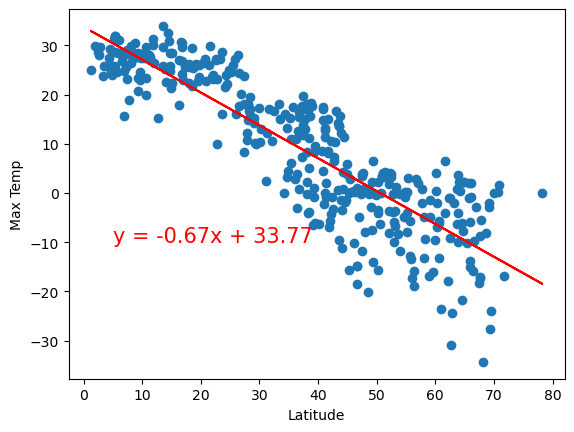

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (5, -10))

The r-value is:  0.670680665375939


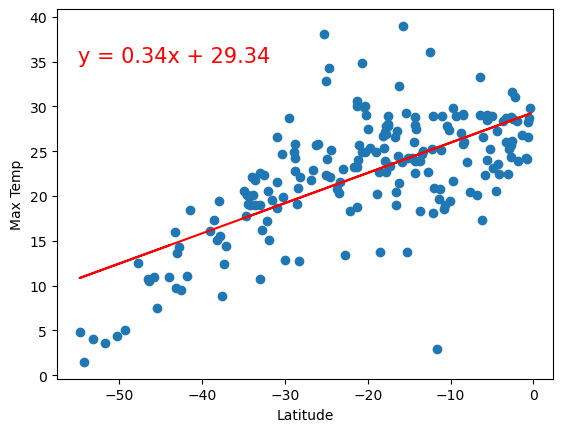

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (-55, 35))

**Discussion about the linear relationship:** There is a correlation between the fields Max Temperature and Latitude as seen in both regression lines and r-values for Northern Hemisphere and Southern Hemisphere. The r-value for The Northern Hemisphere Max Temp vs. Latitude is -0.8754297639079043 which had an absolute value greater than 0.7. Since the r-value for the Northern Hemisphere Max Temp vs. Latitude is negative there is a strong negative correlation between the fields Max Temp and Latitude; as the Latitude increase, the the Max Temp decrease in the Northern Hemisphere. The r-value for The Southern Hemisphere Max Temp vs. Latitude is 0.670680665375939 which had an absolute value greater than 0.5 and less than 0.7. Since the r-value for the Southern Hemisphere Max Temp vs. Latitude is positive there is a moderate positive correlation between the fields Max Temp and Latitude; as the Latitude increase, the the Max Temp increase in the Southern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.34586612973718367


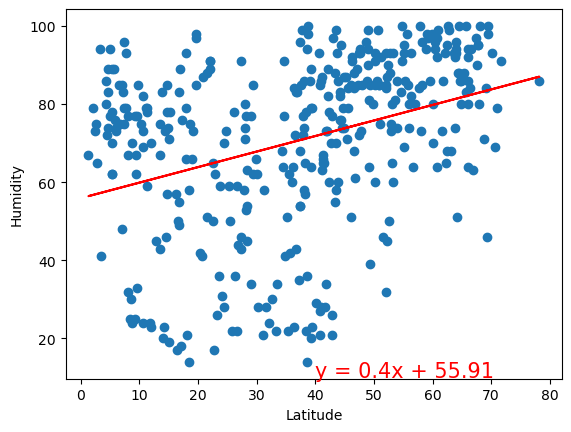

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (40, 10))

The r-value is:  0.18211454105384872


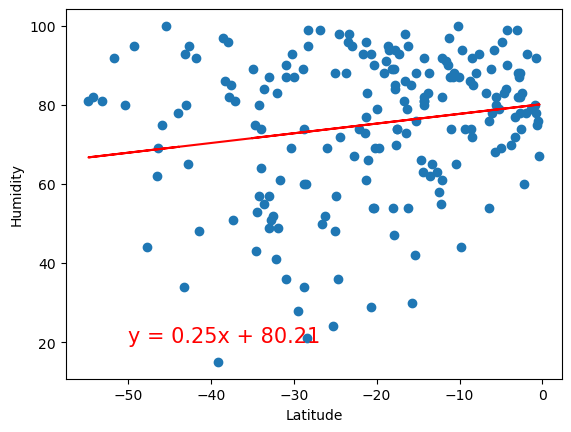

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50, 20))

**Discussion about the linear relationship:** There is a weak correlation between the fields Humidity and Latitude in the Northern Hemisphere as seen in the regression line and the r-value for Northern Hemisphere graph. The r-value for The Northern Hemisphere Humidity vs. Latitude is 0.34586612973718367 which had an absolute value greater than 0.3 and less than 0.5. Since the r-value for the Northern Hemisphere Humidity vs. Latitude is positive there is a weak positive correlation between the fields Humidity and Latitude in the Northern Hemisphere; as the Latitude increase, the the Humidity increase in the Northern Hemisphere. The r-value for The Southern Hemisphere Humidity vs. Latitude is 0.18211454105384872 which had an absolute value less than 0.3. Since the r-value for the Southern Hemisphere Humidity vs. Latitude is positive and the r-value is less than 0.3, there is a little to no (positive) correlation between the fields Humidity and Latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.21123903964744703


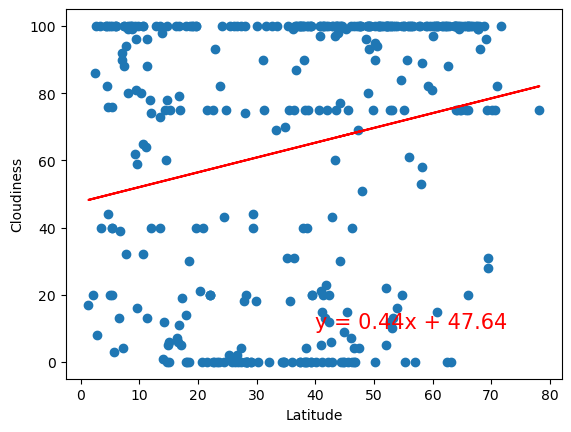

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (40, 10))

The r-value is:  0.2183377270704158


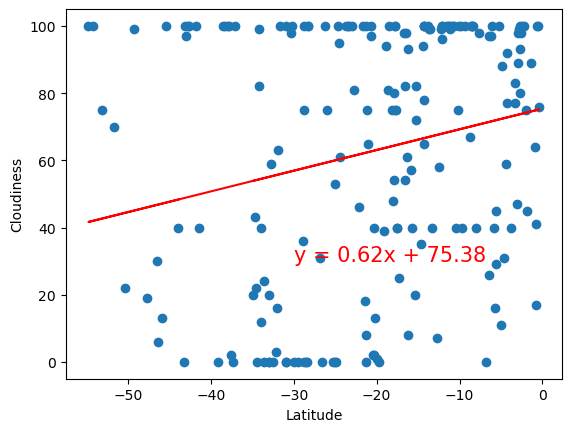

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-30, 30))

**Discussion about the linear relationship:** There little to no correlation between the fields Cloudiness and Latitude in both Northern Hemisphere and Southern Hemisphere as seen in the regression line and the r-value for both Northern Hemisphere and Southern Hemisphere graphs respectively. The r-value for The Northern Hemisphere Cloudiness vs. Latitude is 0.21123903964744703 which had an absolute value less than 0.3. Since the r-value for the Northern Hemisphere Cloudiness vs. Latitude is positive and the r-value is less than 0.3, there is a little to no (positive) correlation between the fields Cloudiness and Latitude in the Northern Hemisphere. The r-value for The Southern Hemisphere Cloudiness vs. Latitude is 0.2183377270704158 which had an absolute value less than 0.3. Since the r-value for the Southern Hemisphere Cloudiness vs. Latitude is positive and the r-value is less than 0.3, there is a little to no (positive) correlation between the fields Cloudiness and Latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  -0.003898499044077258


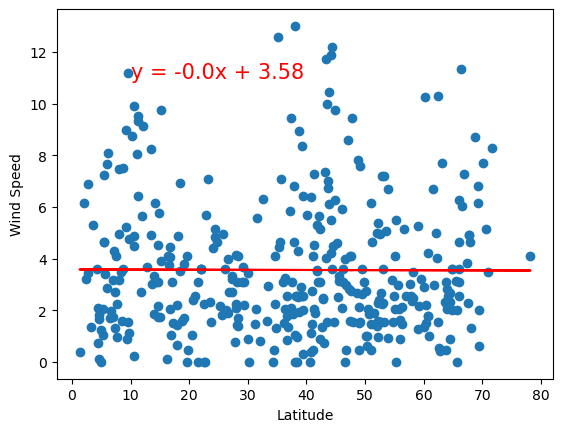

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (10, 11))

The r-value is:  -0.35582367715829305


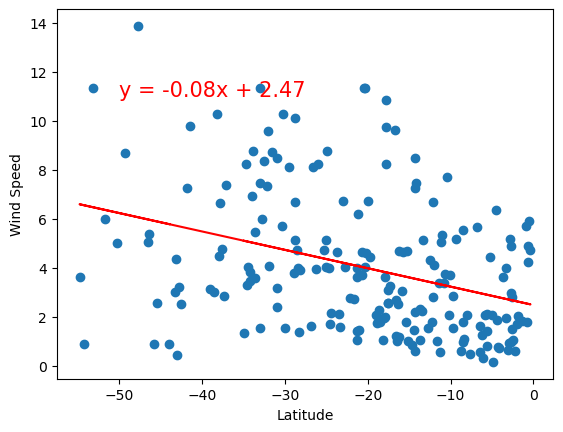

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-50, 11))

**Discussion about the linear relationship:** There little to no correlation between the fields Wind Speed and Latitude in the Northern Hemisphere, and there is a weak correlation between the fields Wind Speed and Latitude in the Southern Hemisphere as seen in the regression line and the r-value for Northern Hemisphere and Southern Hemisphere Wind Speed vs. Latitude graphs respectively. The r-value for The Northern Hemisphere Wind Speed vs. Latitude is -0.003898499044077258 which had an absolute value less than 0.3. Since the r-value for the Northern Hemisphere Wind Speed vs. Latitude is negative and the r-value is less than 0.3, there is a little to no (negative) correlation between the fields Wind Speed and Latitude in the Northern Hemisphere. The r-value for The Southern Hemisphere Wind Speed vs. Latitude is -0.35582367715829305 which had an absolute value greater than 0.3 and less than 0.5. Since the r-value for the Southern Hemisphere Wind Speed vs. Latitude is negative and the r-value is greater than 0.3 and less than 0.5, there is a weak (negative) correlation between the fields Wind Speed and Latitude in the Southern Hemisphere.